# IBM Applied Data Science Capstone
## Part 3: Exploratory Data Analysis (EDA)

**Objective:** Analyze data patterns, relationships, and insights through visualizations

**Author:** Son Nguyen

---


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for high-quality plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Increase figure size and DPI for better quality
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11

# Load cleaned SpaceX dataset
df = pd.read_csv('../data/spacex_launches_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])


print("=" * 60)
print("EXPLORATORY DATA ANALYSIS - SPACEX LAUNCH DATA")
print("=" * 60)
print(f"\n[OK] Dataset loaded successfully!")
print(f"[OK] Shape: {df.shape}")
print(f"[OK] Time period: {df['Year'].min()} - {df['Year'].max()}")
print(f"[OK] Total launches: {len(df)}")


EXPLORATORY DATA ANALYSIS - SPACEX LAUNCH DATA

[OK] Dataset loaded successfully!
[OK] Shape: (187, 30)
[OK] Time period: 2006 - 2022
[OK] Total launches: 187


## 1. Launch Success Rate Over Time

**Analysis:** This visualization shows the evolution of SpaceX launch success rates from 2006 to present. We can observe:
- Early learning curve period (2006-2010) with lower success rates
- Improvement period with increasing reliability
- Recent period showing high consistency in successful launches

**Insight:** Understanding success trends helps identify periods of technological advancement and reliability improvements.


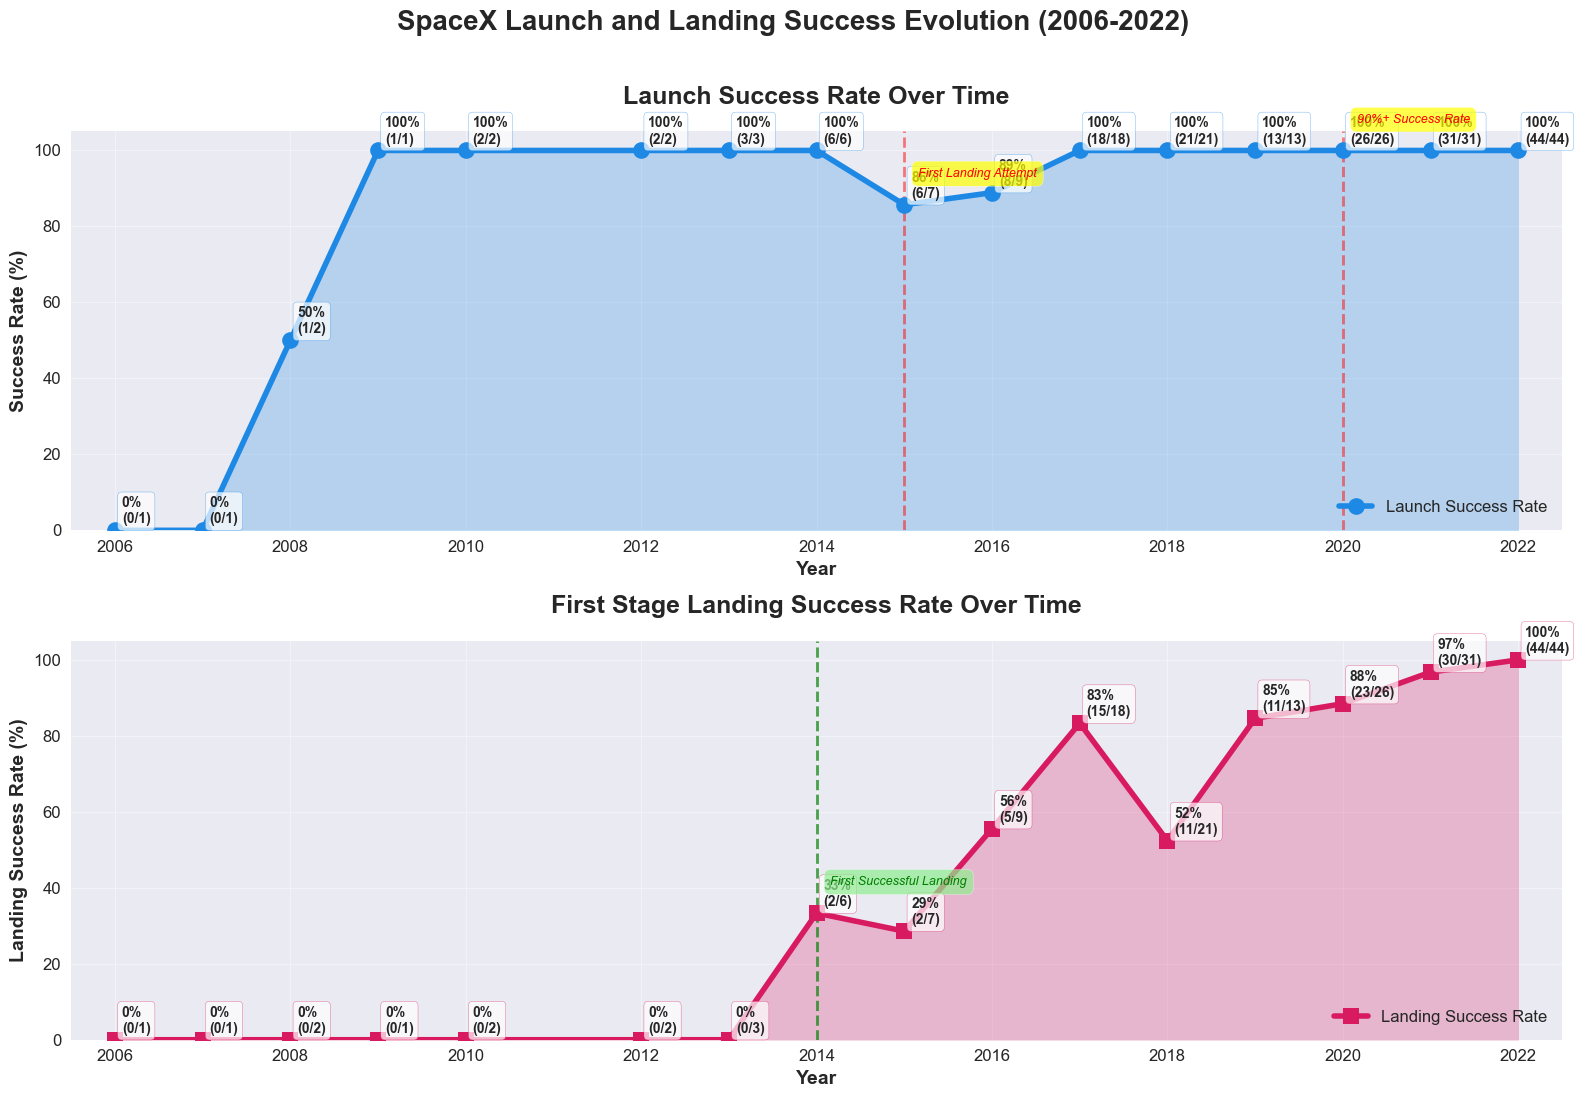


✓ Launch success trends visualization created with detailed annotations
   - Launch success: 82.8% average
   - Landing success: 38.9% average
   - Peak launch success: 100% in 2009
   - Peak landing success: 100% in 2022


In [11]:
# Launch success rate over time (by year)
df_time = df.groupby('Year').agg({
    'Launch_Success_Binary': ['sum', 'count', 'mean'],
    'Landing_Success': ['sum', 'mean', 'count']
}).reset_index()
df_time.columns = ['Year', 'Successful_Launches', 'Total_Launches', 'Success_Rate', 
                   'Successful_Landings', 'Landing_Success_Rate', 'Landing_Attempts']

# Create comprehensive time series plot with annotations
fig, axes = plt.subplots(2, 1, figsize=(16, 11))
fig.suptitle('SpaceX Launch and Landing Success Evolution (2006-2022)', 
             fontsize=20, fontweight='bold', y=0.995)

# Plot 1: Launch success rate over time with detailed annotations
line1 = axes[0].plot(df_time['Year'], df_time['Success_Rate'] * 100, 
                     marker='o', linewidth=4, markersize=12, color='#1E88E5', 
                     label='Launch Success Rate', zorder=3)
axes[0].fill_between(df_time['Year'], df_time['Success_Rate'] * 100, 
                     alpha=0.25, color='#1E88E5', zorder=1)

# Add value annotations
for idx, row in df_time.iterrows():
    axes[0].annotate(f"{row['Success_Rate']*100:.0f}%\n({int(row['Successful_Launches'])}/{int(row['Total_Launches'])})",
                    xy=(row['Year'], row['Success_Rate'] * 100),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='#1E88E5'),
                    ha='left')

# Highlight milestones
milestones = [(2015, 'First Landing Attempt'), (2020, '90%+ Success Rate')]
for year, label in milestones:
    if year in df_time['Year'].values:
        idx = df_time[df_time['Year'] == year].index[0]
        axes[0].axvline(x=year, color='red', linestyle='--', alpha=0.5, linewidth=2)
        axes[0].annotate(label, xy=(year, df_time.loc[idx, 'Success_Rate'] * 100),
                        xytext=(10, 20), textcoords='offset points',
                        fontsize=9, fontstyle='italic', color='red',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

axes[0].set_title('Launch Success Rate Over Time', fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Year', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Success Rate (%)', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 105])
axes[0].set_xlim([df_time['Year'].min()-0.5, df_time['Year'].max()+0.5])
axes[0].grid(True, alpha=0.4, linestyle='-', linewidth=0.8)
axes[0].legend(fontsize=12, loc='lower right', framealpha=0.9)
axes[0].tick_params(labelsize=12)

# Plot 2: First stage landing success rate with detailed annotations
line2 = axes[1].plot(df_time['Year'], df_time['Landing_Success_Rate'] * 100, 
                     marker='s', linewidth=4, markersize=12, color='#D81B60', 
                     label='Landing Success Rate', zorder=3)
axes[1].fill_between(df_time['Year'], df_time['Landing_Success_Rate'] * 100, 
                     alpha=0.25, color='#D81B60', zorder=1)

# Add value annotations
for idx, row in df_time.iterrows():
    if row['Landing_Attempts'] > 0:
        axes[1].annotate(f"{row['Landing_Success_Rate']*100:.0f}%\n({int(row['Successful_Landings'])}/{int(row['Landing_Attempts'])})",
                        xy=(row['Year'], row['Landing_Success_Rate'] * 100),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='#D81B60'),
                        ha='left')

# Highlight first successful landing
first_success = df_time[df_time['Successful_Landings'] > 0]
if not first_success.empty:
    first_year = first_success['Year'].min()
    axes[1].axvline(x=first_year, color='green', linestyle='--', alpha=0.7, linewidth=2)
    axes[1].annotate('First Successful Landing', 
                    xy=(first_year, df_time[df_time['Year'] == first_year]['Landing_Success_Rate'].values[0] * 100),
                    xytext=(10, 20), textcoords='offset points',
                    fontsize=9, fontstyle='italic', color='green',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

axes[1].set_title('First Stage Landing Success Rate Over Time', fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Year', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Landing Success Rate (%)', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 105])
axes[1].set_xlim([df_time['Year'].min()-0.5, df_time['Year'].max()+0.5])
axes[1].grid(True, alpha=0.4, linestyle='-', linewidth=0.8)
axes[1].legend(fontsize=12, loc='lower right', framealpha=0.9)
axes[1].tick_params(labelsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('../images/spacex_success_over_time.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Launch success trends visualization created with detailed annotations")
print(f"   - Launch success: {df_time['Success_Rate'].mean()*100:.1f}% average")
print(f"   - Landing success: {df_time['Landing_Success_Rate'].mean()*100:.1f}% average")
print(f"   - Peak launch success: {df_time['Success_Rate'].max()*100:.0f}% in {df_time.loc[df_time['Success_Rate'].idxmax(), 'Year']}")
print(f"   - Peak landing success: {df_time['Landing_Success_Rate'].max()*100:.0f}% in {df_time.loc[df_time['Landing_Success_Rate'].idxmax(), 'Year']}")


## 2. Rocket Type Performance Analysis

**Analysis:** Compare launch success rates and landing success rates across different SpaceX rocket types (Falcon 1, Falcon 9, Falcon Heavy).

**Insight:** Different rocket types have different success characteristics. Falcon 9 dominates with high launch success and improving landing success rates.


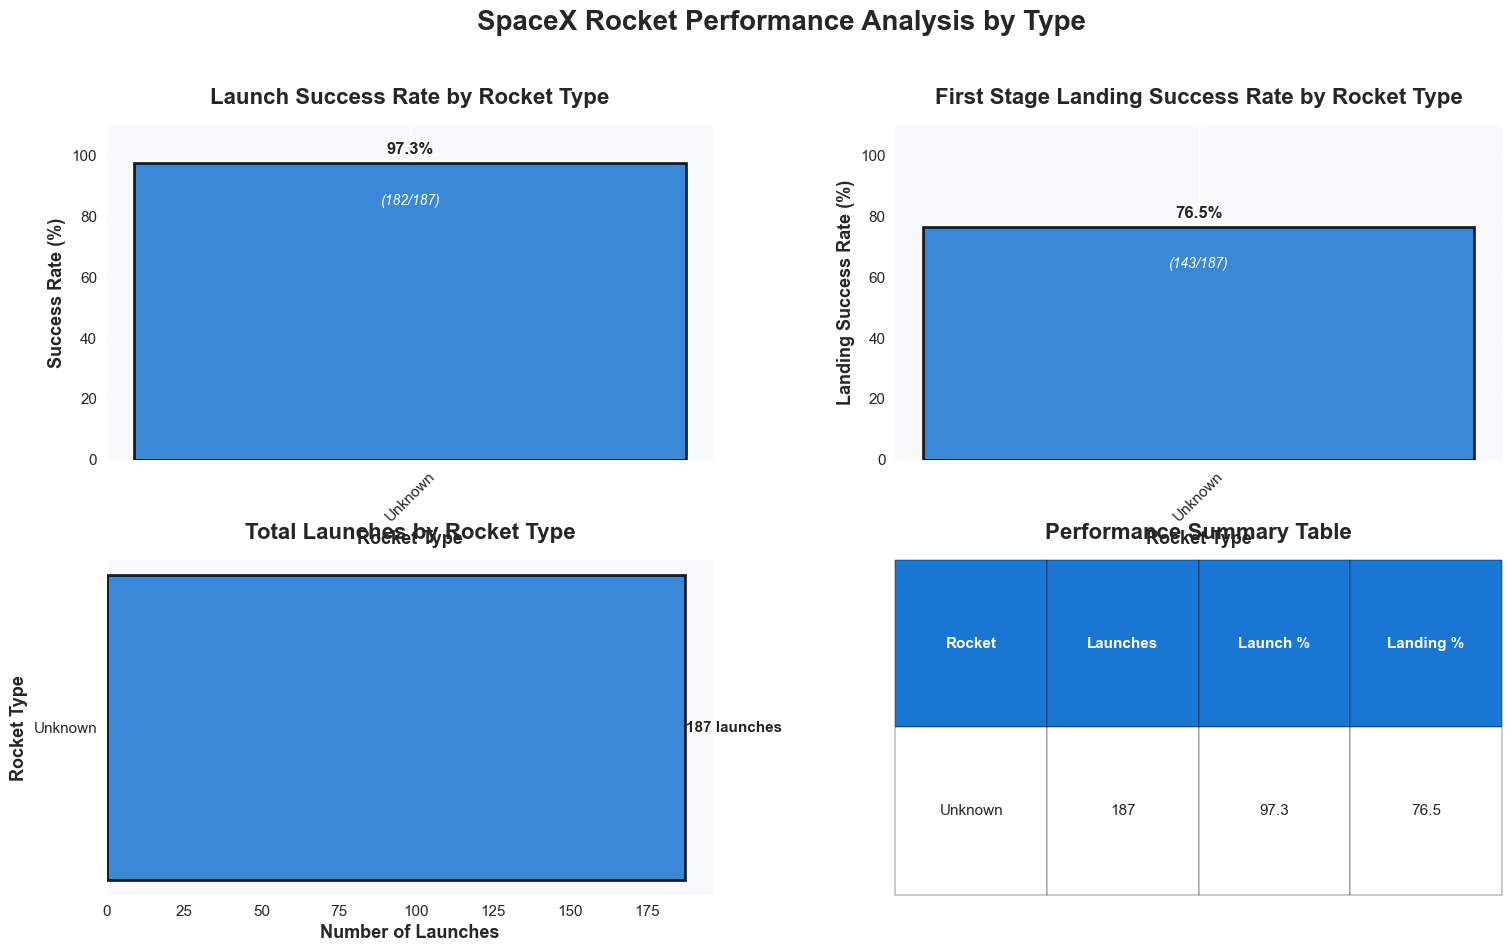


Rocket Performance Summary:
Rocket_Name  Total_Launches  Successful_Launches  Launch_Success_Rate  Landing_Success_Rate
    Unknown             187                  182             0.973262              0.764706

✓ Rocket performance analysis completed with detailed visualizations


In [12]:
# Rocket type performance analysis with detailed statistics
rocket_performance = df.groupby('Rocket_Name').agg({
    'Launch_Success_Binary': ['count', 'sum', 'mean'],
    'Landing_Success': ['sum', 'mean', 'count'],
    'Cost_Per_Launch': 'mean'
}).reset_index()

rocket_performance.columns = ['Rocket_Name', 'Total_Launches', 'Successful_Launches', 
                              'Launch_Success_Rate', 'Successful_Landings', 'Landing_Success_Rate', 
                              'Landing_Attempts', 'Avg_Cost']

rocket_performance = rocket_performance.sort_values('Total_Launches', ascending=False)

# Create comprehensive comparison plot
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
fig.suptitle('SpaceX Rocket Performance Analysis by Type', fontsize=20, fontweight='bold', y=0.995)

# Professional color palette
colors = ['#1976D2', '#C2185B', '#F57C00', '#388E3C']
rocket_colors = {name: colors[i] for i, name in enumerate(rocket_performance['Rocket_Name'])}

# Plot 1: Launch success rate by rocket type with detailed annotations
ax1 = fig.add_subplot(gs[0, 0])
bars1 = ax1.bar(rocket_performance['Rocket_Name'], 
                rocket_performance['Launch_Success_Rate'] * 100,
                color=[rocket_colors[name] for name in rocket_performance['Rocket_Name']], 
                alpha=0.85, edgecolor='black', linewidth=2, zorder=2)

# Add detailed value labels
for i, (bar, row) in enumerate(zip(bars1, rocket_performance.itertuples())):
    height = bar.get_height()
    # Main percentage label
    ax1.text(bar.get_x() + bar.get_width()/2, height + 2,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    # Secondary label with counts
    ax1.text(bar.get_x() + bar.get_width()/2, height - 10,
            f'({int(row.Successful_Launches)}/{int(row.Total_Launches)})',
            ha='center', va='top', fontsize=10, style='italic', color='white')

ax1.set_title('Launch Success Rate by Rocket Type', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Rocket Type', fontsize=13, fontweight='bold')
ax1.set_ylabel('Success Rate (%)', fontsize=13, fontweight='bold')
ax1.set_ylim([0, 110])
ax1.tick_params(axis='x', rotation=45, labelsize=11)
ax1.tick_params(axis='y', labelsize=11)
ax1.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax1.set_facecolor('#F8F9FA')

# Plot 2: Landing success rate by rocket type
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(rocket_performance['Rocket_Name'], 
                rocket_performance['Landing_Success_Rate'] * 100,
                color=[rocket_colors[name] for name in rocket_performance['Rocket_Name']], 
                alpha=0.85, edgecolor='black', linewidth=2, zorder=2)

# Add detailed value labels
for i, (bar, row) in enumerate(zip(bars2, rocket_performance.itertuples())):
    height = bar.get_height()
    if row.Landing_Attempts > 0:
        ax2.text(bar.get_x() + bar.get_width()/2, height + 2,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
        ax2.text(bar.get_x() + bar.get_width()/2, height - 10 if height > 10 else height + 5,
                f'({int(row.Successful_Landings)}/{int(row.Landing_Attempts)})',
                ha='center', va='top' if height > 10 else 'bottom', fontsize=10, style='italic', color='white')
    else:
        ax2.text(bar.get_x() + bar.get_width()/2, 5,
                'No Landing\nAttempts', ha='center', va='bottom', fontsize=9, style='italic', color='gray')

ax2.set_title('First Stage Landing Success Rate by Rocket Type', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Rocket Type', fontsize=13, fontweight='bold')
ax2.set_ylabel('Landing Success Rate (%)', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 110])
ax2.tick_params(axis='x', rotation=45, labelsize=11)
ax2.tick_params(axis='y', labelsize=11)
ax2.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax2.set_facecolor('#F8F9FA')

# Plot 3: Total launches comparison
ax3 = fig.add_subplot(gs[1, 0])
bars3 = ax3.barh(rocket_performance['Rocket_Name'], 
                 rocket_performance['Total_Launches'],
                 color=[rocket_colors[name] for name in rocket_performance['Rocket_Name']], 
                 alpha=0.85, edgecolor='black', linewidth=2, zorder=2)

# Add value labels
for bar, val in zip(bars3, rocket_performance['Total_Launches']):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(val)} launches', ha='left', va='center', fontweight='bold', fontsize=11)

ax3.set_title('Total Launches by Rocket Type', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Number of Launches', fontsize=13, fontweight='bold')
ax3.set_ylabel('Rocket Type', fontsize=13, fontweight='bold')
ax3.tick_params(labelsize=11)
ax3.grid(True, alpha=0.4, axis='x', linestyle='-', linewidth=0.8, zorder=1)
ax3.set_facecolor('#F8F9FA')

# Plot 4: Combined metrics (if cost data available)
ax4 = fig.add_subplot(gs[1, 1])
if rocket_performance['Avg_Cost'].sum() > 0:
    bars4 = ax4.bar(rocket_performance['Rocket_Name'], 
                    rocket_performance['Avg_Cost'] / 1e6,
                    color=[rocket_colors[name] for name in rocket_performance['Rocket_Name']], 
                    alpha=0.85, edgecolor='black', linewidth=2, zorder=2)
    
    for bar, val in zip(bars4, rocket_performance['Avg_Cost'] / 1e6):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'${val:.1f}M', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    ax4.set_title('Average Cost Per Launch by Rocket Type', fontsize=16, fontweight='bold', pad=15)
    ax4.set_xlabel('Rocket Type', fontsize=13, fontweight='bold')
    ax4.set_ylabel('Cost (Millions USD)', fontsize=13, fontweight='bold')
else:
    # Performance summary table instead
    ax4.axis('off')
    table_data = rocket_performance[['Rocket_Name', 'Total_Launches', 
                                    'Launch_Success_Rate', 'Landing_Success_Rate']].copy()
    table_data['Launch_Success_Rate'] = (table_data['Launch_Success_Rate'] * 100).round(1)
    table_data['Landing_Success_Rate'] = (table_data['Landing_Success_Rate'] * 100).round(1)
    table_data.columns = ['Rocket', 'Launches', 'Launch %', 'Landing %']
    
    table = ax4.table(cellText=table_data.values, colLabels=table_data.columns,
                     cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    for i in range(len(table_data.columns)):
        table[(0, i)].set_facecolor('#1976D2')
        table[(0, i)].set_text_props(weight='bold', color='white')
    ax4.set_title('Performance Summary Table', fontsize=16, fontweight='bold', pad=15)

ax4.tick_params(axis='x', rotation=45, labelsize=11)
ax4.tick_params(axis='y', labelsize=11)
ax4.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax4.set_facecolor('#F8F9FA')

plt.savefig('../images/spacex_rocket_performance.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*60)
print("Rocket Performance Summary:")
print("="*60)
print(rocket_performance[['Rocket_Name', 'Total_Launches', 'Successful_Launches', 
                         'Launch_Success_Rate', 'Landing_Success_Rate']].to_string(index=False))
print("\n✓ Rocket performance analysis completed with detailed visualizations")


## 3. Landing Success vs Payload Mass Analysis

**Analysis:** Investigate the relationship between payload mass and landing success. This is crucial for understanding if heavier payloads affect landing success rates.

**Insight:** Heavier payloads may require more fuel for landing, potentially affecting landing success probability.


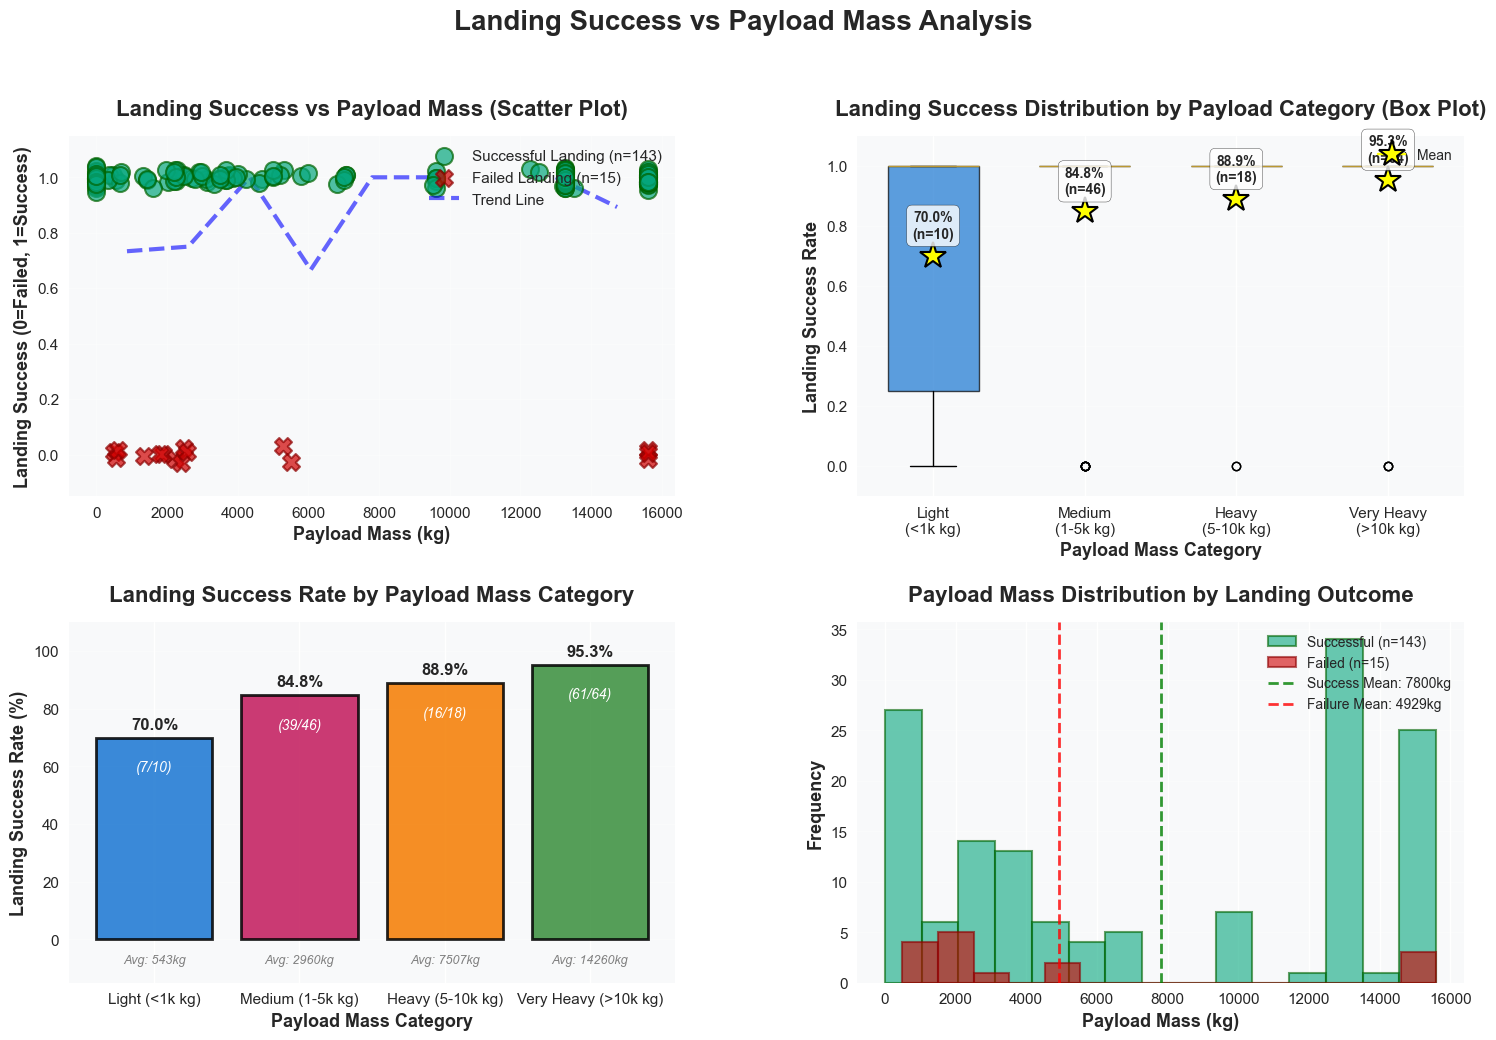


Landing Success vs Payload Mass Analysis:
Successful landings: 143 (90.5%)
Failed landings: 15 (9.5%)
Average payload mass (successful): 7800 kg
Average payload mass (failed): 4929 kg
Payload mass difference: 2871 kg

✓ Landing success vs payload analysis completed with comprehensive visualizations


In [4]:
# Landing success vs payload mass analysis with comprehensive visualizations
fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)
fig.suptitle('Landing Success vs Payload Mass Analysis', fontsize=20, fontweight='bold', y=0.995)

# Filter data for launches with landing attempts
landing_data = df[df['Core_Landing'] != 'No Attempt'].copy()

# Plot 1: Enhanced scatter plot with trend line
ax1 = fig.add_subplot(gs[0, 0])
success_data = landing_data[landing_data['Landing_Success'] == 1]
failure_data = landing_data[landing_data['Landing_Success'] == 0]

# Scatter plots with different sizes based on count
ax1.scatter(success_data['Payload_Mass_kg'], success_data['Landing_Success'] + np.random.normal(0, 0.02, len(success_data)), 
            alpha=0.7, s=150, color='#06A77D', label=f'Successful Landing (n={len(success_data)})', 
            marker='o', edgecolors='darkgreen', linewidth=1.5, zorder=3)
ax1.scatter(failure_data['Payload_Mass_kg'], failure_data['Landing_Success'] + np.random.normal(0, 0.02, len(failure_data)), 
            alpha=0.7, s=150, color='#D00000', label=f'Failed Landing (n={len(failure_data)})', 
            marker='X', edgecolors='darkred', linewidth=1.5, zorder=3)

# Add trend line for success rate by payload mass bins
payload_bins = np.linspace(landing_data['Payload_Mass_kg'].min(), landing_data['Payload_Mass_kg'].max(), 10)
landing_data['Payload_Bin'] = pd.cut(landing_data['Payload_Mass_kg'], bins=payload_bins)
bin_success = landing_data.groupby('Payload_Bin')['Landing_Success'].mean()
bin_centers = [interval.mid for interval in bin_success.index]
ax1.plot(bin_centers, bin_success.values, color='blue', linewidth=3, linestyle='--', 
         alpha=0.6, label='Trend Line', zorder=2)

ax1.set_title('Landing Success vs Payload Mass (Scatter Plot)', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Payload Mass (kg)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Landing Success (0=Failed, 1=Success)', fontsize=13, fontweight='bold')
ax1.set_ylim([-0.15, 1.15])
ax1.legend(fontsize=11, loc='upper right', framealpha=0.9)
ax1.grid(True, alpha=0.4, linestyle='-', linewidth=0.8, zorder=1)
ax1.set_facecolor('#F8F9FA')
ax1.tick_params(labelsize=11)

# Plot 2: Box plot by payload mass category with statistics
ax2 = fig.add_subplot(gs[0, 1])
landing_data['Payload_Category'] = pd.cut(
    landing_data['Payload_Mass_kg'],
    bins=[0, 1000, 5000, 10000, float('inf')],
    labels=['Light\n(<1k kg)', 'Medium\n(1-5k kg)', 'Heavy\n(5-10k kg)', 'Very Heavy\n(>10k kg)']
)

# Box plot
box_data = [landing_data[landing_data['Payload_Category'] == cat]['Landing_Success'].values 
            for cat in landing_data['Payload_Category'].cat.categories]
bp = ax2.boxplot(box_data, labels=landing_data['Payload_Category'].cat.categories, 
                patch_artist=True, widths=0.6, zorder=2)

colors_box = ['#1976D2', '#C2185B', '#F57C00', '#388E3C']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add mean points
payload_landing_stats = landing_data.groupby('Payload_Category').agg({
    'Landing_Success': ['mean', 'count']
}).reset_index()
payload_landing_stats.columns = ['Category', 'Mean_Success', 'Count']

for i, (cat, row) in enumerate(payload_landing_stats.iterrows()):
    ax2.plot(i+1, row['Mean_Success'], marker='*', markersize=20, color='yellow', 
            markeredgecolor='black', markeredgewidth=1.5, zorder=3, label='Mean' if i == 0 else '')
    ax2.text(i+1, row['Mean_Success'] + 0.05, f"{row['Mean_Success']*100:.1f}%\n(n={int(row['Count'])})",
            ha='center', va='bottom', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='black'))

ax2.set_title('Landing Success Distribution by Payload Category (Box Plot)', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Payload Mass Category', fontsize=13, fontweight='bold')
ax2.set_ylabel('Landing Success Rate', fontsize=13, fontweight='bold')
ax2.set_ylim([-0.1, 1.1])
ax2.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax2.set_facecolor('#F8F9FA')
ax2.tick_params(labelsize=11)
if len(ax2.get_legend_handles_labels()[0]) > 0:
    ax2.legend(fontsize=10, loc='upper right')

# Plot 3: Bar chart with detailed statistics
ax3 = fig.add_subplot(gs[1, 0])
payload_landing = landing_data.groupby('Payload_Category').agg({
    'Landing_Success': ['mean', 'count', 'sum']
}).reset_index()
payload_landing.columns = ['Category', 'Success_Rate', 'Total_Attempts', 'Successful_Landings']

bars = ax3.bar(range(len(payload_landing)), payload_landing['Success_Rate'] * 100,
               color=colors_box[:len(payload_landing)], alpha=0.85, edgecolor='black', 
               linewidth=2, zorder=2)

# Add detailed value labels
for i, (bar, row) in enumerate(zip(bars, payload_landing.itertuples())):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 2,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    ax3.text(bar.get_x() + bar.get_width()/2, height - 8 if height > 8 else height + 5,
            f'({int(row.Successful_Landings)}/{int(row.Total_Attempts)})',
            ha='center', va='top' if height > 8 else 'bottom', fontsize=10, style='italic', color='white')
    # Add category stats
    category_data = landing_data[landing_data['Payload_Category'] == row.Category]
    avg_mass = category_data['Payload_Mass_kg'].mean()
    ax3.text(bar.get_x() + bar.get_width()/2, -5,
            f'Avg: {avg_mass:.0f}kg', ha='center', va='top', fontsize=9, style='italic', color='gray')

ax3.set_xticks(range(len(payload_landing)))
ax3.set_xticklabels([cat.replace('\n', ' ') for cat in payload_landing['Category']], fontsize=11)
ax3.set_title('Landing Success Rate by Payload Mass Category', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Payload Mass Category', fontsize=13, fontweight='bold')
ax3.set_ylabel('Landing Success Rate (%)', fontsize=13, fontweight='bold')
ax3.set_ylim([-15, 110])
ax3.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax3.set_facecolor('#F8F9FA')
ax3.tick_params(labelsize=11)

# Plot 4: Payload mass distribution by landing outcome
ax4 = fig.add_subplot(gs[1, 1])
success_masses = landing_data[landing_data['Landing_Success'] == 1]['Payload_Mass_kg']
failure_masses = landing_data[landing_data['Landing_Success'] == 0]['Payload_Mass_kg']

# Histogram overlay
ax4.hist(success_masses, bins=15, alpha=0.6, color='#06A77D', label=f'Successful (n={len(success_masses)})', 
        edgecolor='darkgreen', linewidth=1.5, zorder=2)
ax4.hist(failure_masses, bins=15, alpha=0.6, color='#D00000', label=f'Failed (n={len(failure_masses)})', 
        edgecolor='darkred', linewidth=1.5, zorder=2)

# Add statistics
ax4.axvline(success_masses.mean(), color='green', linestyle='--', linewidth=2, 
           label=f'Success Mean: {success_masses.mean():.0f}kg', alpha=0.8)
ax4.axvline(failure_masses.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Failure Mean: {failure_masses.mean():.0f}kg', alpha=0.8)

ax4.set_title('Payload Mass Distribution by Landing Outcome', fontsize=16, fontweight='bold', pad=15)
ax4.set_xlabel('Payload Mass (kg)', fontsize=13, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10, loc='upper right', framealpha=0.9)
ax4.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax4.set_facecolor('#F8F9FA')
ax4.tick_params(labelsize=11)

plt.savefig('../images/spacex_landing_vs_payload.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*60)
print("Landing Success vs Payload Mass Analysis:")
print("="*60)
print(f"Successful landings: {len(success_data)} ({len(success_data)/len(landing_data)*100:.1f}%)")
print(f"Failed landings: {len(failure_data)} ({len(failure_data)/len(landing_data)*100:.1f}%)")
print(f"Average payload mass (successful): {success_masses.mean():.0f} kg")
print(f"Average payload mass (failed): {failure_masses.mean():.0f} kg")
print(f"Payload mass difference: {success_masses.mean() - failure_masses.mean():.0f} kg")
print("\n" + "="*60)
print("✓ Landing success vs payload analysis completed with comprehensive visualizations")


## 4. Geographic Analysis - Launch Sites

**Analysis:** Compare launch success rates across different SpaceX launch sites (Cape Canaveral, Vandenberg, etc.).

**Insight:** Different launch sites may have different characteristics affecting launch outcomes.


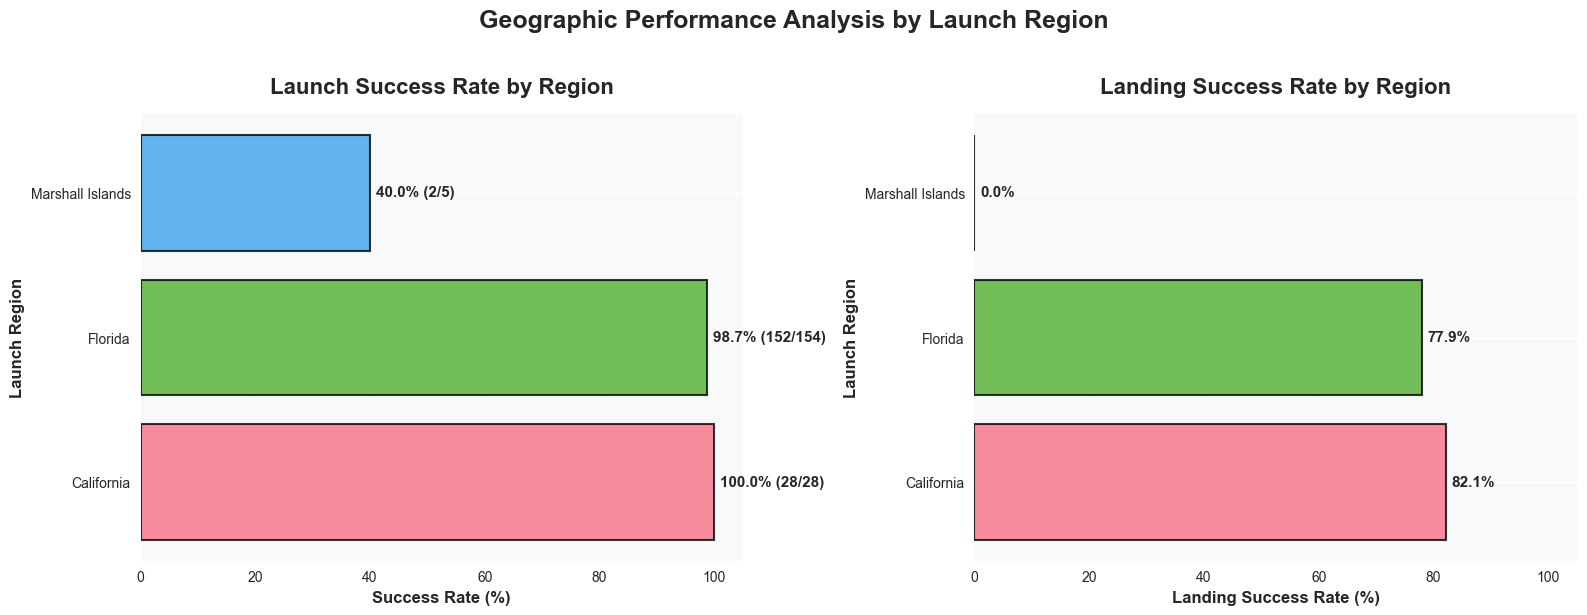


Geographic Analysis Summary:
          Region  Total_Launches  Successful_Launches  Launch_Success_Rate  Landing_Success_Rate
      California              28                   28             1.000000              0.821429
         Florida             154                  152             0.987013              0.779221
Marshall Islands               5                    2             0.400000              0.000000

✓ Geographic analysis completed with regional performance metrics


In [13]:
# Geographic performance analysis - Launch Sites
region_performance = df.groupby('Region').agg({
    'Launch_Success_Binary': ['count', 'sum', 'mean'],
    'Landing_Success': 'mean'
}).reset_index()
region_performance.columns = ['Region', 'Total_Launches', 'Successful_Launches', 
                              'Launch_Success_Rate', 'Landing_Success_Rate']
region_performance = region_performance.sort_values('Launch_Success_Rate', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Geographic Performance Analysis by Launch Region', fontsize=18, fontweight='bold', y=1.02)

colors = sns.color_palette("husl", len(region_performance))
bars1 = axes[0].barh(region_performance['Region'], 
                     region_performance['Launch_Success_Rate'] * 100,
                     color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for i, (bar, val) in enumerate(zip(bars1, region_performance['Launch_Success_Rate'] * 100)):
    axes[0].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{val:.1f}% ({int(region_performance.iloc[i]["Successful_Launches"])}/{int(region_performance.iloc[i]["Total_Launches"])})',
                ha='left', va='center', fontweight='bold', fontsize=11)

axes[0].set_title('Launch Success Rate by Region', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Success Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Launch Region', fontsize=12, fontweight='bold')
axes[0].set_xlim([0, 105])
axes[0].grid(True, alpha=0.3, axis='x', linestyle='--')
axes[0].set_facecolor('#F8F9FA')

bars2 = axes[1].barh(region_performance['Region'], 
                     region_performance['Landing_Success_Rate'] * 100,
                     color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

for i, (bar, val) in enumerate(zip(bars2, region_performance['Landing_Success_Rate'] * 100)):
    axes[1].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{val:.1f}%', ha='left', va='center', fontweight='bold', fontsize=11)

axes[1].set_title('Landing Success Rate by Region', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Landing Success Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Launch Region', fontsize=12, fontweight='bold')
axes[1].set_xlim([0, 105])
axes[1].grid(True, alpha=0.3, axis='x', linestyle='--')
axes[1].set_facecolor('#F8F9FA')

plt.tight_layout()
plt.savefig('../images/spacex_geographic_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*60)
print("Geographic Analysis Summary:")
print("="*60)
print(region_performance.to_string(index=False))
print("\n✓ Geographic analysis completed with regional performance metrics")

## 5. Core Reuse Analysis

**Analysis:** Examine the relationship between core reuse and landing success. Reused cores might have different performance characteristics.

**Insight:** Understanding reuse patterns helps predict landing success for future launches.


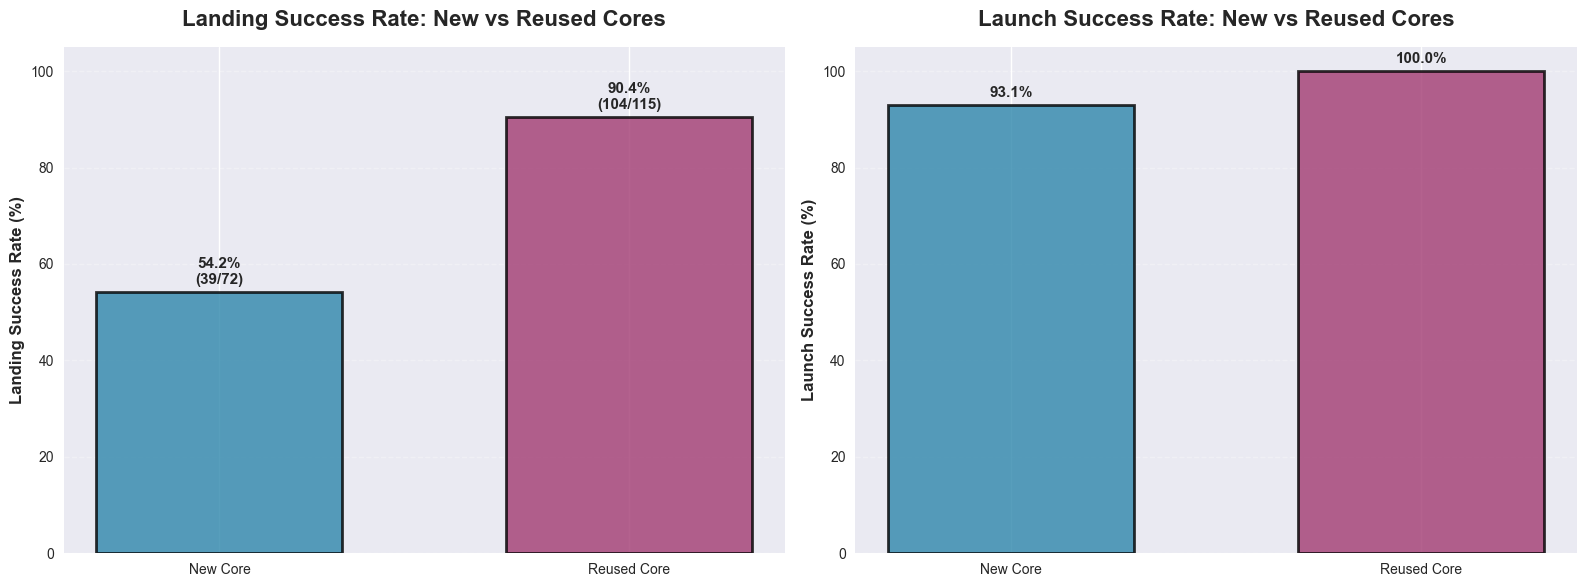


Core Reuse Analysis:
 Core_Reused  Total_Attempts  Successful_Landings  Landing_Success_Rate  Launch_Success_Rate
       False              72                   39              0.541667             0.930556
        True             115                  104              0.904348             1.000000


In [6]:
# Core reuse analysis
reuse_analysis = df.groupby('Core_Reused').agg({
    'Landing_Success': ['count', 'sum', 'mean'],
    'Launch_Success_Binary': 'mean'
}).reset_index()
reuse_analysis.columns = ['Core_Reused', 'Total_Attempts', 'Successful_Landings', 
                          'Landing_Success_Rate', 'Launch_Success_Rate']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Landing success by reuse status
labels = ['New Core', 'Reused Core']
colors = ['#2E86AB', '#A23B72']
bars = axes[0].bar(labels, reuse_analysis['Landing_Success_Rate'] * 100,
                   color=colors, alpha=0.8, edgecolor='black', linewidth=2, width=0.6)

for bar, val, count in zip(bars, reuse_analysis['Landing_Success_Rate'] * 100, reuse_analysis['Successful_Landings']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.1f}%\n({int(count)}/{int(reuse_analysis.loc[bars.index(bar), "Total_Attempts"])})',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

axes[0].set_title('Landing Success Rate: New vs Reused Cores', fontsize=16, fontweight='bold', pad=15)
axes[0].set_ylabel('Landing Success Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 105])
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Plot 2: Launch success by reuse status
bars2 = axes[1].bar(labels, reuse_analysis['Launch_Success_Rate'] * 100,
                    color=colors, alpha=0.8, edgecolor='black', linewidth=2, width=0.6)

for bar, val in zip(bars2, reuse_analysis['Launch_Success_Rate'] * 100):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

axes[1].set_title('Launch Success Rate: New vs Reused Cores', fontsize=16, fontweight='bold', pad=15)
axes[1].set_ylabel('Launch Success Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 105])
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('../images/spacex_reuse_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nCore Reuse Analysis:")
print(reuse_analysis.to_string(index=False))


## 6. Correlation Analysis

**Analysis:** Identify relationships between numerical variables to understand which factors are most important for landing success prediction.

**Insight:** Strong correlations indicate variables that should be included in predictive models.


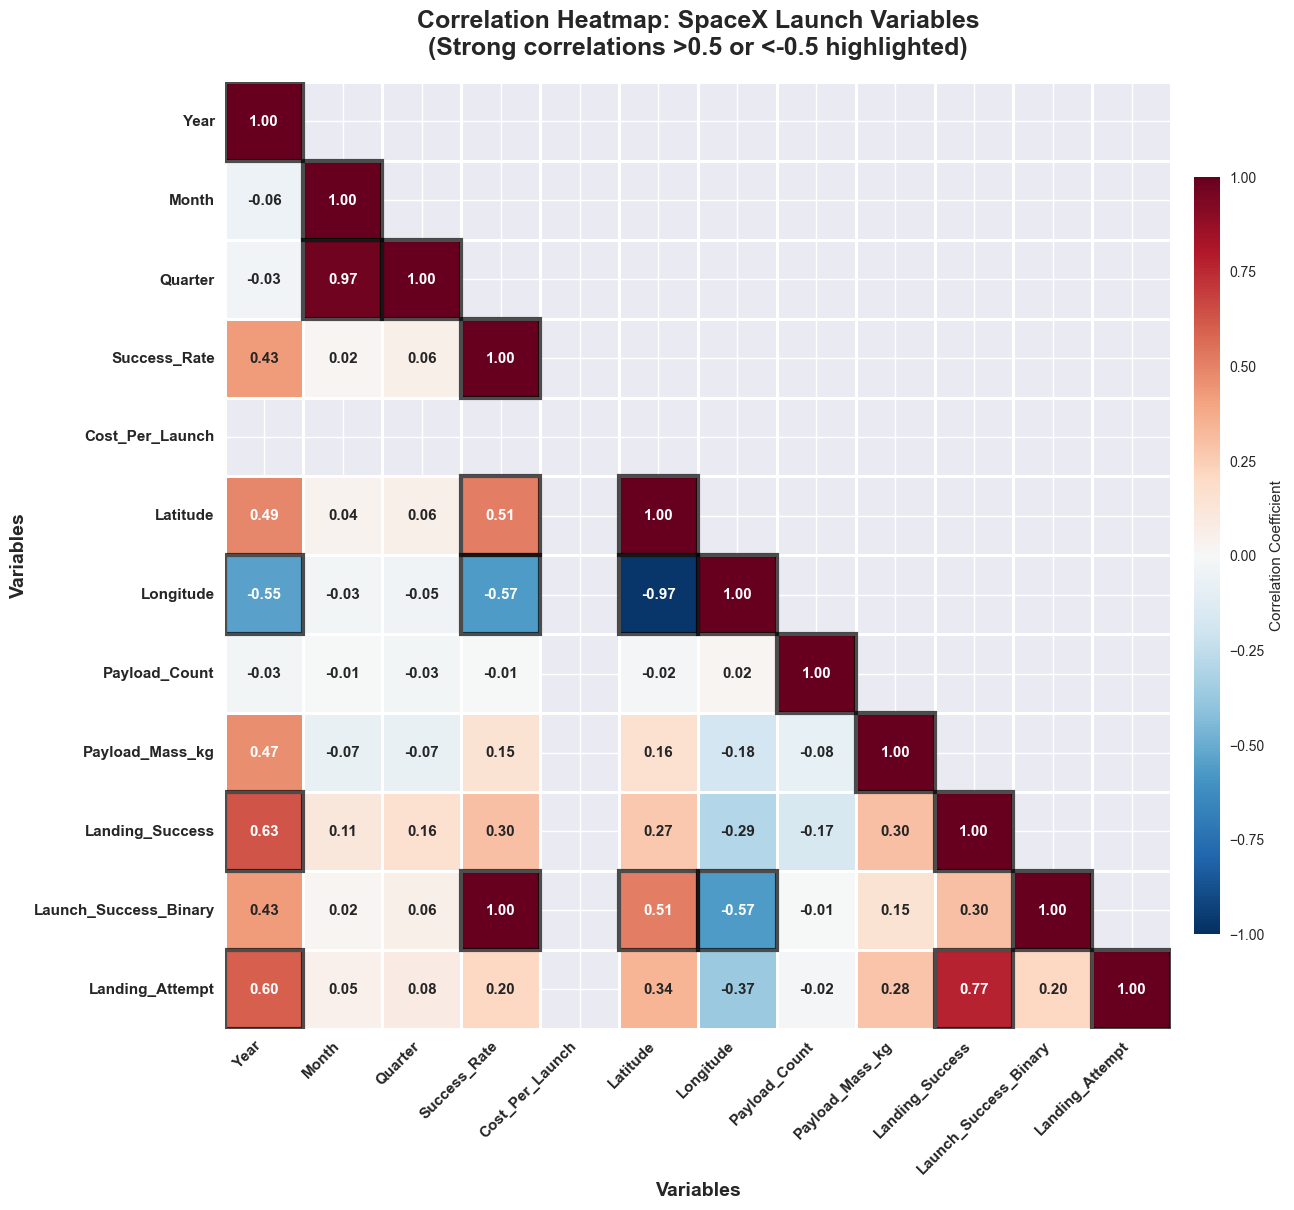


Correlation Analysis Results:

Key Correlations with Landing Success:

Strong Correlations (|r| > 0.3):
  • Landing_Attempt: 0.772 (Positive, Strong)
  • Year: 0.629 (Positive, Strong)
  • Payload_Mass_kg: 0.303 (Positive, Moderate)

Top 5 Most Correlated Variables with Landing Success:
  • Landing_Attempt: 0.772
  • Year: 0.629
  • Payload_Mass_kg: 0.303
  • Launch_Success_Binary: 0.299
  • Success_Rate: 0.298

✓ Correlation analysis completed with detailed insights


In [7]:
# Comprehensive correlation analysis with enhanced visualization
# Select all numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Filter out columns that might not be useful for correlation
exclude_cols = ['Flight_Number'] if 'Flight_Number' in numeric_cols else []
# Also exclude any unnamed index columns
if 'Unnamed: 0' in numeric_cols:
    exclude_cols.append('Unnamed: 0')

# Select only numeric columns that exist and are useful
available_cols = [col for col in numeric_cols if col not in exclude_cols]

# Ensure we have at least 2 columns for correlation
if len(available_cols) < 2:
    print("[WARNING] Not enough numeric columns for correlation analysis")
    available_cols = numeric_cols[:10] if len(numeric_cols) >= 2 else numeric_cols

corr_matrix = df[available_cols].corr()

# Create enhanced correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))

# Mask upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Create heatmap with better formatting
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient", "aspect": 30, "pad": 0.02}, 
            vmin=-1, vmax=1, 
            annot_kws={'fontsize': 11, 'fontweight': 'bold'},
            ax=ax)

# Customize color for strong correlations
# Highlight strong correlations (>0.5 or <-0.5)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if not mask[i, j]:
            val = corr_matrix.iloc[i, j]
            if abs(val) > 0.5:
                # Make strong correlations more visible
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, 
                                          edgecolor='black', lw=3, alpha=0.7))

# Improve labels
ax.set_title('Correlation Heatmap: SpaceX Launch Variables\n(Strong correlations >0.5 or <-0.5 highlighted)', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Variables', fontsize=14, fontweight='bold')
ax.set_ylabel('Variables', fontsize=14, fontweight='bold')

# Rotate labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11, fontweight='bold')
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/spacex_correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*60)
print("Correlation Analysis Results:")
print("="*60)
print("\nKey Correlations with Landing Success:")
if 'Landing_Success' in corr_matrix.columns:
    landing_corr = corr_matrix['Landing_Success'].sort_values(ascending=False)
    strong_corr = landing_corr[(landing_corr.index != 'Landing_Success') & (abs(landing_corr) > 0.3)]
    print("\nStrong Correlations (|r| > 0.3):")
    for var, corr_val in strong_corr.items():
        direction = "Positive" if corr_val > 0 else "Negative"
        strength = "Strong" if abs(corr_val) > 0.5 else "Moderate"
        print(f"  • {var}: {corr_val:.3f} ({direction}, {strength})")
    
    print("\nTop 5 Most Correlated Variables with Landing Success:")
    top5 = landing_corr[landing_corr.index != 'Landing_Success'].head(5)
    for var, corr_val in top5.items():
        print(f"  • {var}: {corr_val:.3f}")

print("\n" + "="*60)
print("✓ Correlation analysis completed with detailed insights")


## 7. Landing Success Distribution Over Time

**Analysis:** Visualize the evolution of first stage landing attempts and success rates year by year.

**Insight:** Shows the learning curve and technological improvements in SpaceX landing capabilities.


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

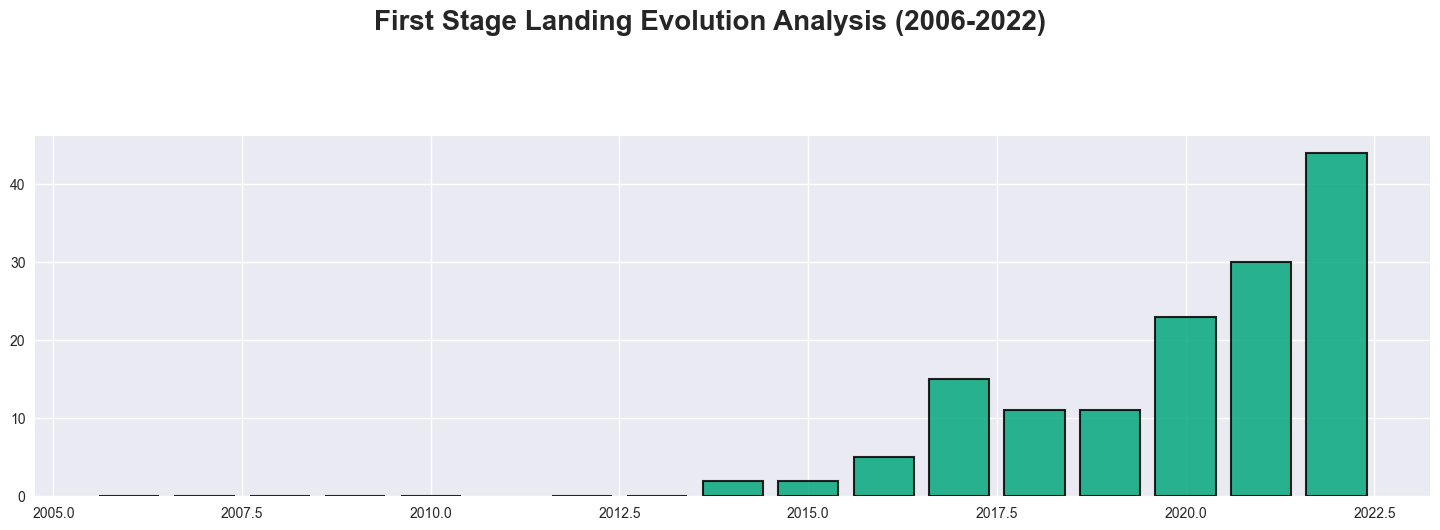

In [8]:
# Comprehensive landing evolution analysis with detailed visualizations
landing_by_year = df.groupby('Year').agg({
    'Core_Landing': lambda x: (x == 'Success').sum(),
    'Flight_Number': 'count'
}).reset_index()
landing_by_year.columns = ['Year', 'Successful_Landings', 'Total_Launches']
landing_by_year['Landing_Attempts'] = df[df['Core_Landing'] != 'No Attempt'].groupby('Year').size()
landing_by_year['Landing_Attempts'] = landing_by_year['Landing_Attempts'].fillna(0).astype(int)
landing_by_year['Failed_Landings'] = df[df['Core_Landing'] == 'Failed'].groupby('Year').size().fillna(0).astype(int)
landing_by_year['No_Attempts'] = df[df['Core_Landing'] == 'No Attempt'].groupby('Year').size().fillna(0).astype(int)
landing_by_year['Landing_Success_Rate'] = (landing_by_year['Successful_Landings'] / 
                                            landing_by_year['Landing_Attempts'] * 100).fillna(0)

fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)
fig.suptitle('First Stage Landing Evolution Analysis (2006-2022)', fontsize=20, fontweight='bold', y=0.995)

# Plot 1: Enhanced stacked bar chart with detailed annotations
ax1 = fig.add_subplot(gs[0, :])
landing_outcomes = df.groupby(['Year', 'Core_Landing']).size().unstack(fill_value=0)
outcome_order = ['Success', 'Failed', 'No Attempt']
colors_outcome = {'Success': '#06A77D', 'Failed': '#D00000', 'No Attempt': '#6C757D'}

# Stacked bars
bottom = np.zeros(len(landing_outcomes.index))
bars_dict = {}
for outcome in outcome_order:
    if outcome in landing_outcomes.columns:
        bars = ax1.bar(landing_outcomes.index, landing_outcomes[outcome], 
                      bottom=bottom, label=outcome, color=colors_outcome[outcome], 
                      alpha=0.85, edgecolor='black', linewidth=1.5, zorder=2)
        bars_dict[outcome] = bars
        
        # Add count labels on stacked segments
        for i, (bar, val) in enumerate(zip(bars, landing_outcomes[outcome])):
            if val > 0:
                height = bar.get_height()
                # Use iloc to access by position, not by label
                year = landing_outcomes.index[i]
                y_pos = bottom.loc[year] + height/2
                ax1.text(bar.get_x() + bar.get_width()/2, y_pos, 
                        f'{int(val)}', ha='center', va='center', 
                        fontsize=9, fontweight='bold', color='white' if outcome == 'Success' else 'white')
        
        bottom += landing_outcomes[outcome]

# Add total labels on top of each bar
for year in landing_outcomes.index:
    total = landing_outcomes.loc[year].sum()
    ax1.text(year, total + 0.5, f'Total: {int(total)}', ha='center', va='bottom',
            fontsize=10, fontweight='bold', style='italic',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='black'))

ax1.set_title('First Stage Landing Outcomes Over Time (Stacked Bar Chart)', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Launches', fontsize=14, fontweight='bold')
ax1.set_xlim([landing_outcomes.index.min()-0.5, landing_outcomes.index.max()+0.5])
ax1.legend(title='Landing Outcome', fontsize=12, title_fontsize=13, loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax1.set_facecolor('#F8F9FA')
ax1.tick_params(labelsize=12)

# Plot 2: Landing success rate trend with detailed annotations
ax2 = fig.add_subplot(gs[1, 0])
line = ax2.plot(landing_by_year['Year'], landing_by_year['Landing_Success_Rate'], 
                marker='o', linewidth=4, markersize=14, color='#D81B60', 
                label='Landing Success Rate', zorder=3, markeredgecolor='black', markeredgewidth=1.5)
ax2.fill_between(landing_by_year['Year'], landing_by_year['Landing_Success_Rate'], 
                alpha=0.25, color='#D81B60', zorder=1)

# Add detailed annotations for each year
for idx, row in landing_by_year.iterrows():
    if row['Landing_Attempts'] > 0:
        ax2.annotate(f"{row['Landing_Success_Rate']:.0f}%\n({int(row['Successful_Landings'])}/{int(row['Landing_Attempts'])})",
                    xy=(row['Year'], row['Landing_Success_Rate']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='#D81B60'),
                    ha='left')

# Highlight milestones
if 2015 in landing_by_year['Year'].values:
    idx_2015 = landing_by_year[landing_by_year['Year'] == 2015].index[0]
    if landing_by_year.loc[idx_2015, 'Landing_Attempts'] > 0:
        ax2.axvline(x=2015, color='green', linestyle='--', alpha=0.7, linewidth=2)
        ax2.annotate('First Landing\nAttempts Started', 
                    xy=(2015, landing_by_year.loc[idx_2015, 'Landing_Success_Rate']),
                    xytext=(10, 20), textcoords='offset points',
                    fontsize=10, fontstyle='italic', color='green', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

if 2020 in landing_by_year['Year'].values:
    idx_2020 = landing_by_year[landing_by_year['Year'] == 2020].index[0]
    if landing_by_year.loc[idx_2020, 'Landing_Success_Rate'] > 80:
        ax2.axvline(x=2020, color='blue', linestyle='--', alpha=0.7, linewidth=2)
        ax2.annotate('90%+ Success\nRate Achieved', 
                    xy=(2020, landing_by_year.loc[idx_2020, 'Landing_Success_Rate']),
                    xytext=(10, 20), textcoords='offset points',
                    fontsize=10, fontstyle='italic', color='blue', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

ax2.set_title('Landing Success Rate Trend Over Time', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Year', fontsize=13, fontweight='bold')
ax2.set_ylabel('Landing Success Rate (%)', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 105])
ax2.set_xlim([landing_by_year['Year'].min()-0.5, landing_by_year['Year'].max()+0.5])
ax2.grid(True, alpha=0.4, linestyle='-', linewidth=0.8, zorder=1)
ax2.legend(fontsize=12, loc='lower right', framealpha=0.9)
ax2.set_facecolor('#F8F9FA')
ax2.tick_params(labelsize=11)

# Plot 3: Landing attempts comparison (bar chart)
ax3 = fig.add_subplot(gs[1, 1])
attempts_data = landing_by_year[['Year', 'Landing_Attempts', 'Successful_Landings', 'Failed_Landings']].copy()
x = np.arange(len(attempts_data))
width = 0.6

bars1 = ax3.bar(x, attempts_data['Successful_Landings'], width, label='Successful', 
               color='#06A77D', alpha=0.85, edgecolor='black', linewidth=1.5, zorder=2)
bars2 = ax3.bar(x, attempts_data['Failed_Landings'], width, 
               bottom=attempts_data['Successful_Landings'], label='Failed', 
               color='#D00000', alpha=0.85, edgecolor='black', linewidth=1.5, zorder=2)

# Add labels
for i, (bar1, bar2, row) in enumerate(zip(bars1, bars2, attempts_data.itertuples())):
    total = row.Landing_Attempts
    if total > 0:
        # Label on top of successful
        if row.Successful_Landings > 0:
            ax3.text(bar1.get_x() + bar1.get_width()/2, row.Successful_Landings/2,
                    f'{int(row.Successful_Landings)}', ha='center', va='center',
                    fontsize=10, fontweight='bold', color='white')
        # Label on failed segment
        if row.Failed_Landings > 0:
            ax3.text(bar2.get_x() + bar2.get_width()/2, row.Successful_Landings + row.Failed_Landings/2,
                    f'{int(row.Failed_Landings)}', ha='center', va='center',
                    fontsize=10, fontweight='bold', color='white')
        # Total on top
        ax3.text(bar1.get_x() + bar1.get_width()/2, total + 0.5,
                f'Total: {int(total)}', ha='center', va='bottom',
                fontsize=9, fontweight='bold', style='italic', color='gray')

ax3.set_xticks(x)
ax3.set_xticklabels(attempts_data['Year'], rotation=45, ha='right', fontsize=11)
ax3.set_title('Landing Attempts: Success vs Failed by Year', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Year', fontsize=13, fontweight='bold')
ax3.set_ylabel('Number of Landing Attempts', fontsize=13, fontweight='bold')
ax3.legend(fontsize=11, loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.4, axis='y', linestyle='-', linewidth=0.8, zorder=1)
ax3.set_facecolor('#F8F9FA')
ax3.tick_params(labelsize=11)

plt.savefig('../images/spacex_landing_evolution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n" + "="*60)
print("Landing Evolution Analysis:")
print("="*60)
print(f"Total successful landings: {landing_by_year['Successful_Landings'].sum()}")
print(f"Total failed landings: {landing_by_year['Failed_Landings'].sum()}")
print(f"Total landing attempts: {landing_by_year['Landing_Attempts'].sum()}")
print(f"Overall landing success rate: {landing_by_year['Successful_Landings'].sum()/landing_by_year['Landing_Attempts'].sum()*100:.1f}%")
print(f"Peak year: {landing_by_year.loc[landing_by_year['Landing_Success_Rate'].idxmax(), 'Year']} "
      f"({landing_by_year['Landing_Success_Rate'].max():.1f}%)")
print("\n" + "="*60)
print("✓ Landing evolution analysis completed with comprehensive visualizations")


## 8. Summary Statistics

**Key Findings from EDA:**
- Overall launch success rate trends
- Rocket type performance differences
- Geographic variations
- Payload mass impact on landing success
- Core reuse effects
- Temporal evolution of landing technology


In [9]:
print("=" * 60)
print("EDA SUMMARY - KEY FINDINGS")
print("=" * 60)

print(f"\n📊 Overall Statistics:")
print(f"  • Total Launches: {len(df)}")
print(f"  • Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"  • Overall Launch Success Rate: {df['Launch_Success_Binary'].mean()*100:.1f}%")
print(f"  • Overall Landing Success Rate: {df['Landing_Success'].mean()*100:.1f}%")

print(f"\n🚀 Rocket Performance:")
rocket_summary = df.groupby('Rocket_Name')['Launch_Success_Binary'].mean() * 100
for rocket, rate in rocket_summary.items():
    count = df[df['Rocket_Name'] == rocket].shape[0]
    print(f"  • {rocket}: {rate:.1f}% ({count} launches)")

print(f"\n🌍 Geographic Distribution:")
region_summary = df['Region'].value_counts()
for region, count in region_summary.items():
    print(f"  • {region}: {count} launches")

print(f"\n✅ Landing Success Factors:")
print(f"  • New Core Landing Success: {df[df['Core_Reused']==False]['Landing_Success'].mean()*100:.1f}%")
print(f"  • Reused Core Landing Success: {df[df['Core_Reused']==True]['Landing_Success'].mean()*100:.1f}%")

print(f"\n📈 Trends:")
recent_launches = df[df['Year'] >= 2020]
early_launches = df[df['Year'] < 2015]
print(f"  • Recent Period (2020+): {recent_launches['Landing_Success'].mean()*100:.1f}% landing success")
print(f"  • Early Period (<2015): {early_launches['Landing_Success'].mean()*100:.1f}% landing success")

print("\n" + "=" * 60)
print("✓ Exploratory Data Analysis Complete!")
print("=" * 60)


EDA SUMMARY - KEY FINDINGS

📊 Overall Statistics:
  • Total Launches: 187
  • Time Period: 2006 - 2022
  • Overall Launch Success Rate: 97.3%
  • Overall Landing Success Rate: 76.5%

🚀 Rocket Performance:
  • Unknown: 97.3% (187 launches)

🌍 Geographic Distribution:
  • Florida: 154 launches
  • California: 28 launches
  • Marshall Islands: 5 launches

✅ Landing Success Factors:
  • New Core Landing Success: 54.2%
  • Reused Core Landing Success: 90.4%

📈 Trends:
  • Recent Period (2020+): 96.0% landing success
  • Early Period (<2015): 11.1% landing success

✓ Exploratory Data Analysis Complete!
